In [99]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [5]:
response_col = ["Coal_Share_PhasedOut","Coal_Gen_Decline_Perc","Gas_Gen_Decline_Perc"]
selected_indep = [#"logGDPpc",
    "R_Choice","num_supply_policy", "WDI_Coal_El_.","WDI_NG_El_.", "Share_VRE_Gen",
                    "Coal_logCurrent_MW","Gas_logCurrent_MW","LogBP_GasR2P_yr",
                    "HHI_Coal_Import","HHI_Gas_Import","NetValue_Coal_Import","NetValue_Gas_Import"]
rate_col = ["rate_coal_cap_5y","rate_coal_gen_5y","rate_gas_gen_5y"]

In [150]:
truncated = pd.read_csv("../temporal_country_models/imputation/coal_data_amelia_impAll.csv")
truncated = truncated[["Unnamed: 0"]+response_col+selected_indep]
truncated[["Country Code","Year"]] = truncated["Unnamed: 0"].str.split("-",expand=True)
truncated = truncated.set_index("Unnamed: 0")
#truncated = truncated[response_col+selected_indep]
truncated

,Coal_Share_PhasedOut,Coal_Gen_Decline_Perc,Gas_Gen_Decline_Perc,R_Choice,num_supply_policy,WDI_Coal_El_.,WDI_NG_El_.,Share_VRE_Gen,Coal_logCurrent_MW,Gas_logCurrent_MW,LogBP_GasR2P_yr,HHI_Coal_Import,HHI_Gas_Import,NetValue_Coal_Import,NetValue_Gas_Import,Country Code,Year
Unnamed: 0,,,,,,,,,,,,,,,,,
AGO-2017,0.0,0.0,0.0,0.0,9,0.000000,22.867853,0.001873,0.000000,6.579251,0.0,0.999078,0.955154,26004.219,-1098078.478,AGO,2017
AGO-2018,0.0,0.0,0.0,0.0,11,0.000000,18.691590,0.001559,0.000000,6.579251,0.0,0.781185,0.443159,32861.556,-1477428.514,AGO,2018
AGO-2019,0.0,0.0,0.0,0.0,11,0.000000,23.246754,0.001299,0.000000,6.579251,0.0,0.994798,0.658362,11635.767,-1177467.463,AGO,2019
AGO-2020,0.0,0.0,0.0,0.0,11,0.000000,22.108433,0.001206,0.000000,6.579251,0.0,0.952575,0.626992,3562.037,-989078.637,AGO,2020
AGO-2021,0.0,0.0,0.0,0.0,11,0.000000,23.676200,0.001217,0.000000,6.579251,0.0,0.955716,0.958681,4688.344,-2920660.896,AGO,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE-2017,0.0,0.0,0.0,0.0,3,41.088436,0.000000,0.001361,6.856462,0.000000,0.0,0.591283,0.873425,-2728.786,185.172,ZWE,2017
ZWE-2018,0.0,0.0,0.0,0.0,4,40.152340,0.000000,0.002176,6.856462,0.000000,0.0,0.902050,0.988295,-2397.637,92.390,ZWE,2018
ZWE-2019,0.0,0.0,0.0,0.0,5,43.932040,0.000000,0.003641,6.856462,0.000000,0.0,0.560143,0.512025,-6520.530,152.534,ZWE,2019


In [161]:
year_truncated2[year_truncated2["LogBP_GasR2P_yr"]<1]

,Unnamed: 0,Coal_Share_PhasedOut,Coal_Gen_Decline_Perc,Gas_Gen_Decline_Perc,R_Choice,num_supply_policy,WDI_Coal_El_.,WDI_NG_El_.,Share_VRE_Gen,Coal_logCurrent_MW,Gas_logCurrent_MW,LogBP_GasR2P_yr,HHI_Coal_Import,HHI_Gas_Import,NetValue_Coal_Import,NetValue_Gas_Import,Country Code,Year,gas_lifetime,coal_lifetime
32,ARE-2022,100.000000,0.000000,0.000000,0.0,5,0.000000,29.817164,0.044952,0.000000,10.635783,0.000000,0.619953,1.000000,6.109897e+06,-9.141230e+06,ARE,2022,15.720509,0.000000
138,AUT-2022,100.000000,98.341232,18.048780,1.0,7,0.216417,18.179007,0.149328,0.000000,8.443977,-0.748387,0.329712,0.772912,1.623451e+06,2.246377e+06,AUT,2022,16.455563,0.000000
166,AZE-2022,0.000000,0.000000,0.000000,0.0,3,12.629677,47.296961,0.004967,0.000000,8.436200,0.000000,0.688263,0.743790,-5.826093e+04,1.651081e+05,AZE,2022,22.182390,0.000000
194,BEL-2022,100.000000,99.765945,25.032425,1.0,14,0.042292,24.444914,0.205329,0.000000,8.588024,0.000000,0.250935,0.347283,-6.388880e+05,2.991226e+06,BEL,2022,19.288429,0.000000
222,BGD-2022,0.000000,0.000000,0.000000,0.0,7,19.354309,66.071026,0.007744,7.956827,9.404179,0.000000,0.440033,0.885442,2.346615e+05,8.432542e+05,BGD,2022,9.543290,2.711033
250,BGR-2022,18.989931,22.302942,9.345794,1.0,8,42.289440,5.753262,0.062278,8.546558,7.090077,0.004301,0.585201,0.500613,-1.403966e+06,3.208607e+06,BGR,2022,44.770833,40.968149
295,BIH-2022,0.000000,0.000000,0.000000,0.0,0,64.266269,11.816961,0.033867,7.636752,0.000000,-0.738775,0.492409,0.825128,9.345687e+05,2.752254e+06,BIH,2022,0.000000,37.825374
323,BLR-2022,0.000000,0.000000,0.000000,0.0,9,4.378917,72.136598,0.011832,0.000000,9.031214,-0.225235,0.660323,0.884782,-9.157621e+05,-1.182369e+06,BLR,2022,29.336244,0.000000
346,BOL-2022,0.000000,0.000000,0.000000,1.0,2,18.906329,50.993690,0.086069,0.000000,7.569412,0.460989,0.717139,0.767404,4.785911e+05,4.126067e+06,BOL,2022,5.577399,0.000000
374,BRA-2022,3.081147,40.198701,0.000000,0.0,11,26.257846,37.794863,0.156386,8.063693,9.581628,0.856461,0.532234,0.483271,4.426697e+06,5.936063e+06,BRA,2022,11.620792,16.729304


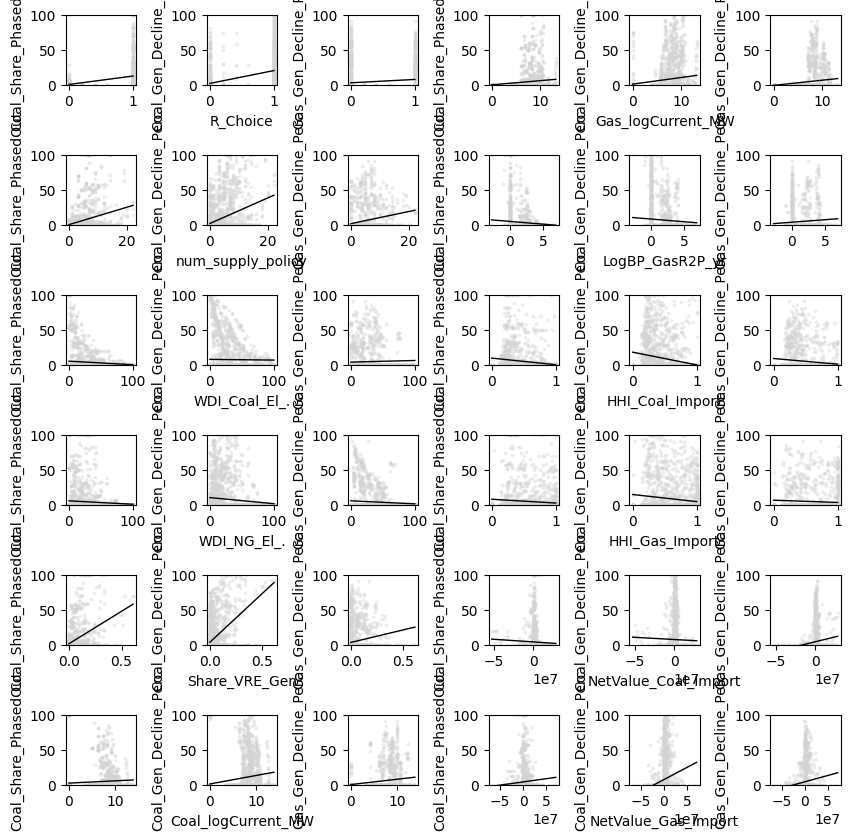

In [162]:
fig, axes = plt.subplots(6,6,figsize=(10,10))
fig.subplots_adjust(wspace=1,hspace=1)

for xval in selected_indep:
    indep_num = selected_indep.index(xval)
    if indep_num >5:
        ax_row = indep_num-6
    else:
        ax_row = indep_num
    for yval in response_col:
        response_num = response_col.index(yval)
        if indep_num > 5:
            ax_col = response_num+3
        else:
            ax_col = response_num
        this_ax = axes[ax_row,ax_col]
        sns.regplot(x=truncated[xval], y=truncated[yval], ci=False, line_kws={'color':'black',"lw":1}, 
                    ax=this_ax, scatter_kws={"s":3,"color":"lightgray","alpha":0.3});
        this_ax.set_ylabel(yval)
        this_ax.set_ylim([0,100])
        if ax_col==1 or ax_col==4:
            this_ax.set_xlabel(xval)
        else:
            this_ax.set_xlabel("")


### Lifetime

In [67]:
gas_plant_data = pd.read_csv("../../data/global_GEM/analysis_plant/gas_plant_annual_summary.csv")
coal_plant_data = pd.read_csv("../../data/global_GEM/analysis_plant/coal_plant_annual_summary.csv")
gas_plant_data = gas_plant_data.rename(columns={"Mean Lifetime":"gas_lifetime"})
coal_plant_data = coal_plant_data.rename(columns={"Mean Lifetime":"coal_lifetime"})
crosswalk = pd.read_excel("../../data/country_names.xlsx",sheet_name="crosswalk")

In [70]:
lifetime_data = pd.merge(gas_plant_data[["Country","gas_lifetime","Year"]],coal_plant_data[["Country","coal_lifetime","Year"]],
                         on=["Country","Year"],how="outer")
lifetime_data2 = pd.merge(lifetime_data,crosswalk[["Country Code","GEM_Name"]],
                          left_on="Country",right_on="GEM_Name",how="left")
lifetime_data2 = lifetime_data2.drop(columns=["Country","GEM_Name"])
lifetime_data2

,gas_lifetime,Year,coal_lifetime,Country Code
0,0.0,1924,NaN,GBR
1,0.0,1925,NaN,RUS
2,1.0,1925,NaN,GBR
3,1.0,1926,NaN,RUS
4,2.0,1926,NaN,GBR
...,...,...,...,...
5903,NaN,2022,40.000000,MNE
5904,NaN,2022,48.000000,NAM
5905,NaN,2022,36.081081,PRK
5906,NaN,2022,6.090909,ZMB


In [80]:
year_truncated = truncated.reset_index()
year_truncated[["Country Code","Year"]] = year_truncated["Unnamed: 0"].str.split("-",expand=True)
year_truncated["Year"] = year_truncated["Year"].astype(int)
year_truncated = pd.merge(year_truncated,lifetime_data2, on = ["Country Code","Year"],how="left")
year_truncated = year_truncated.fillna(0)
year_truncated

,Unnamed: 0,Coal_Share_PhasedOut,Coal_Gen_Decline_Perc,Gas_Gen_Decline_Perc,R_Choice,num_supply_policy,WDI_Coal_El_.,WDI_NG_El_.,Share_VRE_Gen,Coal_logCurrent_MW,Gas_logCurrent_MW,LogBP_GasR2P_yr,HHI_Coal_Import,HHI_Gas_Import,NetValue_Coal_Import,NetValue_Gas_Import,Country Code,Year,gas_lifetime,coal_lifetime
0,AGO-2017,0.0,0.0,0.0,0.0,9,0.000000,22.867853,0.001873,0.000000,6.579251,0.0,0.999078,0.955154,26004.219,-1098078.478,AGO,2017,0.0,0.000000
1,AGO-2018,0.0,0.0,0.0,0.0,11,0.000000,18.691590,0.001559,0.000000,6.579251,0.0,0.781185,0.443159,32861.556,-1477428.514,AGO,2018,1.0,0.000000
2,AGO-2019,0.0,0.0,0.0,0.0,11,0.000000,23.246754,0.001299,0.000000,6.579251,0.0,0.994798,0.658362,11635.767,-1177467.463,AGO,2019,2.0,0.000000
3,AGO-2020,0.0,0.0,0.0,0.0,11,0.000000,22.108433,0.001206,0.000000,6.579251,0.0,0.952575,0.626992,3562.037,-989078.637,AGO,2020,3.0,0.000000
4,AGO-2021,0.0,0.0,0.0,0.0,11,0.000000,23.676200,0.001217,0.000000,6.579251,0.0,0.955716,0.958681,4688.344,-2920660.896,AGO,2021,4.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,ZWE-2017,0.0,0.0,0.0,0.0,3,41.088436,0.000000,0.001361,6.856462,0.000000,0.0,0.591283,0.873425,-2728.786,185.172,ZWE,2017,0.0,32.473684
2782,ZWE-2018,0.0,0.0,0.0,0.0,4,40.152340,0.000000,0.002176,6.856462,0.000000,0.0,0.902050,0.988295,-2397.637,92.390,ZWE,2018,0.0,33.473684
2783,ZWE-2019,0.0,0.0,0.0,0.0,5,43.932040,0.000000,0.003641,6.856462,0.000000,0.0,0.560143,0.512025,-6520.530,152.534,ZWE,2019,0.0,34.473684
2784,ZWE-2020,0.0,0.0,0.0,0.0,5,44.342106,0.000000,0.003953,6.856462,0.000000,0.0,0.658081,0.723465,-15921.606,42.703,ZWE,2020,0.0,35.473684


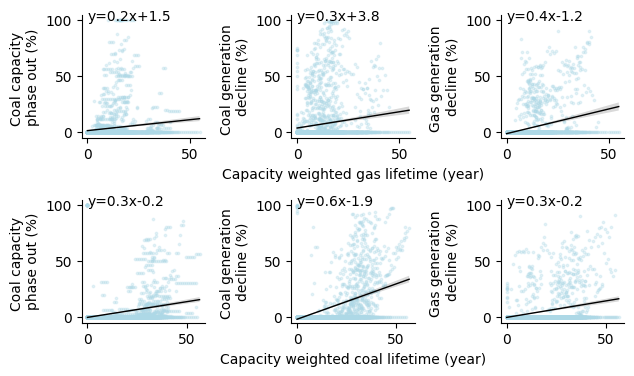

In [107]:
lifetime_val = ["gas_lifetime","coal_lifetime"]
lifetime_label = ["Capacity weighted gas lifetime (year)","Capacity weighted coal lifetime (year)"]
response_label = ["Coal capacity \nphase out (%)","Coal generation \ndecline (%)","Gas generation \ndecline (%)"]
fig, axes = plt.subplots(2,3,figsize=(7,4))
fig.subplots_adjust(wspace=0.7,hspace=0.5)
for xval in lifetime_val:
    row_ind = lifetime_val.index(xval)
    for yval in response_col:
        col_ind = response_col.index(yval)
        this_ax = axes[row_ind,col_ind]
        slope, intercept, r_value, p_value, std_err = stats.linregress(year_truncated[xval],year_truncated[yval])
        sns.regplot(x=year_truncated[xval], y=year_truncated[yval], line_kws={'color':'black',"lw":1}, 
                    ax=this_ax, scatter_kws={"s":3,"color":"lightblue","alpha":0.3})
        if intercept<0:
            this_ax.text(0,100,"y={0:.1f}x{1:.1f}".format(slope,intercept))
        else:
            this_ax.text(0,100,"y={0:.1f}x+{1:.1f}".format(slope,intercept))
        if col_ind == 1:
            this_ax.set_xlabel(lifetime_label[row_ind])
        else:
            this_ax.set_xlabel("")
        this_ax.set_ylabel(response_label[col_ind])
        #this_ax.legend()
        this_ax.set_ylim([-5,105])
        this_ax.spines['top'].set_visible(False)
        this_ax.spines['right'].set_visible(False)

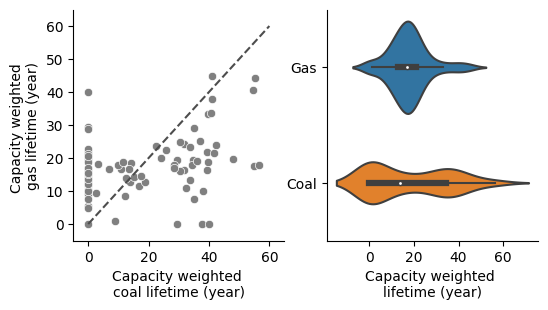

In [141]:
fig, axes = plt.subplots(1,2,figsize=(6,3))

year_truncated2 = year_truncated[year_truncated["Year"]==2022]
sns.scatterplot(x=year_truncated2["coal_lifetime"], y=year_truncated2["gas_lifetime"],color="gray",ax=axes[0])
axes[0].plot([0,60],[0,60], ls="--", c=".3")
axes[0].set_ylabel("Capacity weighted \ngas lifetime (year)")
axes[0].set_xlabel("Capacity weighted \ncoal lifetime (year)")
axes[0].set_ylim([-5,65])
axes[0].set_xlim([-5,65])

melted_data = pd.melt(year_truncated2, id_vars=['Country Code'], value_vars=['gas_lifetime','coal_lifetime'],
        var_name='type', value_name='lifetime')
melted_data = melted_data.replace("gas_lifetime","Gas")
melted_data = melted_data.replace("coal_lifetime","Coal")
sns.violinplot(data=melted_data, x="lifetime", y="type",ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_xlabel("Capacity weighted \nlifetime (year)")
for this_ax in axes.reshape(-1): 
    this_ax.spines['top'].set_visible(False)
    this_ax.spines['right'].set_visible(False)
fig.savefig("Capacity_weighted_lifetime.png",dpi=600, bbox_inches='tight')
